In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Uploading the data with low_memory=False to handle mixed data types
loan_df = pd.read_csv('C:/Users/Abhishek.Malik/AppData/Roaming/jupyter/loan.csv', low_memory=False)
print("Data uploaded successfully.")

# Drops columns with 50% missing values
loan_df = loan_df.dropna(thresh=len(loan_df) * 0.5, axis=1)
print(f"Shape after dropping the columns: {loan_df.shape}")
 
# Handling specific columns (convert interest rate to numeric, etc.)
if 'int_rate' in loan_df.columns:
    loan_df['int_rate'] = loan_df['int_rate'].replace('%', '', regex=True).astype(float)
    print("Converted 'int_rate' to numeric.")
else:
    print("Warning: 'int_rate' column not found in the dataset.")
 
# Filling missing values in key columns
if 'mths_since_last_delinq' in loan_df.columns:
    median_delinq = loan_df['mths_since_last_delinq'].median()
    loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(median_delinq)
    print("Filled missing values in 'mths_since_last_delinq'.")
else:
    print("Warning: 'mths_since_last_delinq' column not found in the dataset.")
 
# Info about the dataframe
print("\nData Info:")
print(loan_df.info())
 
# First few rows
print("\nFirst few rows of the dataset:")
print(loan_df.head())
 
# Column names
print("\nColumn names:")
print(loan_df.columns.tolist())

Dataset loaded successfully.
Shape after dropping columns with >50% missing values: (39717, 54)
Converted 'int_rate' to numeric.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  e

C:\Users\Abhishek.Malik\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


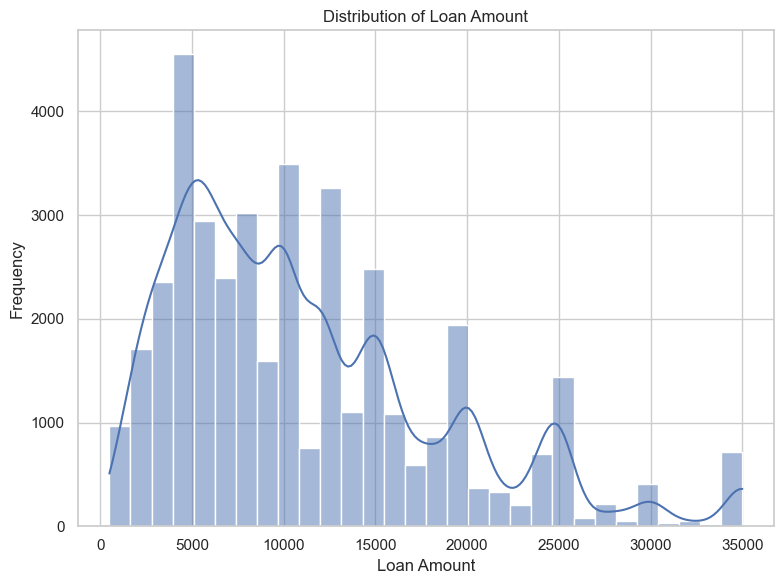

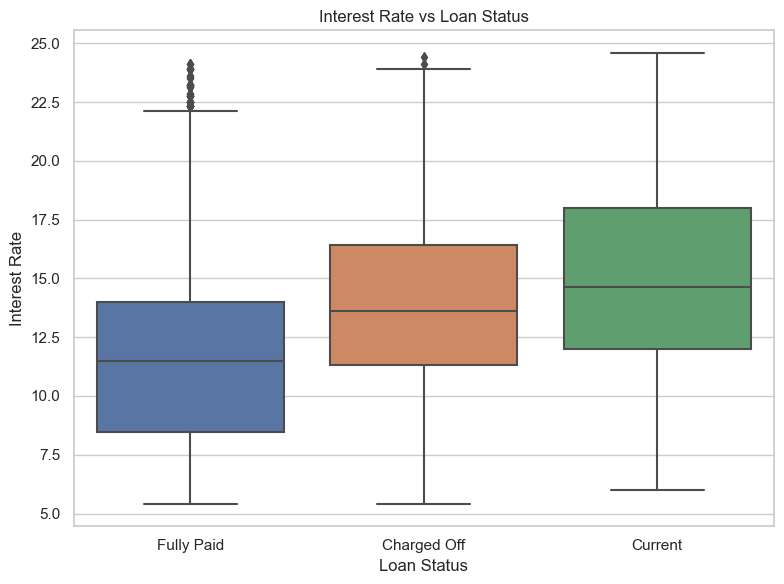

C:\Users\Abhishek.Malik\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


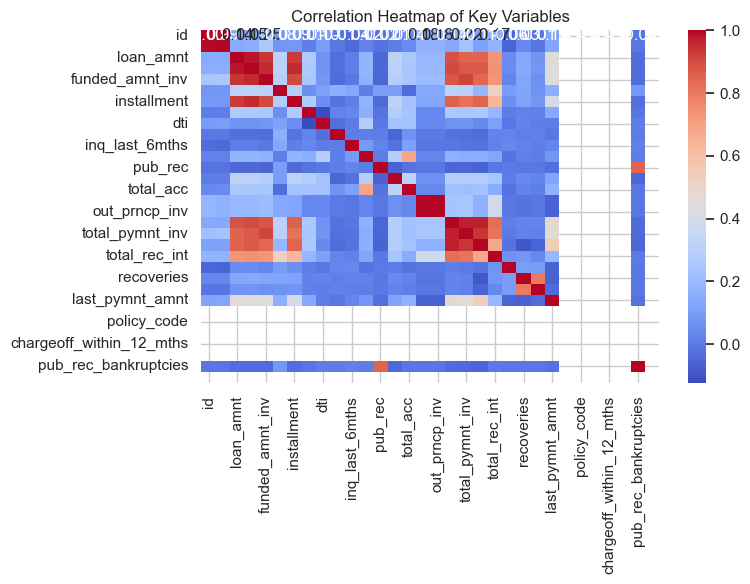

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'loan_df' is your DataFrame

# 1. Univariate Analysis: Distribution of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(loan_df['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('univariate_analysis_loan_amount.png')
plt.show()

# 2. Bivariate Analysis: Interest Rate vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_df, x='loan_status', y='int_rate')
plt.title('Interest Rate vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.tight_layout()
plt.savefig('bivariate_analysis_interest_rate.png')
plt.show()

# 3. Correlation Heatmap
# Ensure only numeric columns are used
numeric_loan_df = loan_df.select_dtypes(include=['number'])

# Calculate the correlation matrix of the relevant numerical features
correlation_matrix = numeric_loan_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.savefig('correlation_analysis_heatmap.png')
plt.show()
